In [1]:
import sys
sys.path.append('../')

import math
import random
import statistics
import sources.distances as dist

euclidean = 1
manhattan = 2
minkowski = 3

In [2]:
import csv
from random import shuffle

def getDataLC(datasetName, lines, columns, randomize=False):
         
    with open(datasetName,'r') as File:
        reader = csv.reader(File, delimiter=',', quotechar=',',
                            quoting=csv.QUOTE_MINIMAL)

        l_reader = list(reader)
        
        
        if randomize:
            shuffle(l_reader)
            
        
    data=[] 
    tmp = [[l_reader[i][j] for j in columns] for i in lines]
    for row in tmp:
        data.append([num(i) for i in row])
      
    return data

In [3]:
def num(s):
    try:
        return float(s)
    except ValueError:
        return s

In [4]:
# Referência [1] do K-Means --> https://bit.ly/2GJTLO6
# Artigo de Madhu G. Nadig (https://github.com/madhug-nadig)

# Referência [2] do K-Means --> https://bit.ly/2pRWH0Z
# Artigo de Matthew Mayo (https://github.com/mmmayo13)

# Referência [3] do K-Means --> https://bit.ly/2sAS4Ng
# Artigo de Mubaris NK (https://github.com/mubaris)

In [5]:
class clusters(dict):
    def __init__(self):
        pass

    def iter_columns(self,cluster):
        try:
            return range(len(self[cluster][0]))
        except Exception:
            return []
    
    def iter_lines(self,cluster):
        try:
            return range(len(self[cluster]))
        except Exception:
            return []       
        

In [6]:
class k_means:
    
    def __init__ (self, k = 2, tolerance = 0.0001, max_iterations = 500 ):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.centroids = []
        self.clusters = clusters()

        
        
    def initialize_cluster(self):
        '''
         Inicializa a K clusters, como listas vazias.
        '''
        self.clusters = clusters()
        for i in range(self.k):
            self.clusters[i] = []
   


    def initialize_centoids(self,data):
        '''
         Inicializa as K centroides, em posições aleatórias dentro do limite de Max e Min.
        '''
               
        self.centroids = []
        columns_max = []
        columns_min = []
        
        # Cálcula o Max e o Min de cada coordenada (coluna)
        for j in range(len(data[0])):
            temp = [data[i][j] for i in range(len(data))]
            columns_max.append(max(temp))
            columns_min.append(min(temp))
        
        # Cria K ponto (centroid) aleatórios, entre o valor máximo e mínimo de cada coordenada
        for i in range(self.k):
            p = []
            for i_max, i_min in zip(columns_max,columns_min):
                p.append(random.uniform(i_min, i_max))
            
            self.centroids.append(p)
            
        # print("\nCentroides inicializados:")
        # print(self.centroids)
        # print("\n")
        
        
        
    def update_centroids(self):
        '''
         Atualiza as K centroides, deslocando-as para o ponto médio de seus respctivos cluester.
        '''
    
        for cluster in self.clusters:
            p = []
            for j in self.clusters.iter_columns(cluster):
                column = [self.clusters[cluster][i][j] for i in self.clusters.iter_lines(cluster)]
                p.append(statistics.mean(column))

            self.centroids[cluster] = p        
        
        
        
    def classifies_points(self, data, distanceMethod):
        '''
         Calcula a distancia de todos os pontos para cada centroide
         Classifica cada ponto do conjunto data como pertecendo a um dos clusters (centroids)
        '''
        
        for row in data:
            if distanceMethod == euclidean:
                distances=[dist.euclideanDistance(row,centroid) for centroid in self.centroids]
            elif distanceMethod == manhattan:
                distances=[dist.manhattanDistance(row,centroid) for centroid in self.centroids]
            elif distanceMethod == minkowski:
                distances=[dist.minkowskiDistance(row,centroid) for centroid in self.centroids]
                
            clusterType = distances.index(min(distances))
            self.clusters[clusterType].append(row)
            
            
    def stop_threshold(self, list_a, list_b, distanceMethod):
        
        for a,b in zip(list_a, list_b):
            if distanceMethod == euclidean:
                if dist.euclideanDistance(list_a,list_b) > self.tolerance:
                    return False
            elif distanceMethod == manhattan:
                if dist.manhattanDistance(list_a,list_b) > self.tolerance:
                    return False
            elif distanceMethod == minkowski:
                if dist.minkowskiDistance(list_a,list_b) > self.tolerance:
                    return False
            
        return True
    
    
    def fit(self, data, distanceMethod = euclidean):
        
        changed = True
        iteration = 0
        
        # Inicializa as K centroides (posições aleatórias)
        self.initialize_centoids(data)
        
        while changed: #.... repete a porra toda
            
            # Update iteration number
            iteration += 1
            
            # Inicializa a K clusters, como uma listas vazias.
            self.initialize_cluster()
            
            # Calcula a distancia de todos os pontos para cada centroide
            # Classifica cada ponto do conjunto data como pertecendo a um dos clusters (centroids)
            self.classifies_points(data, distanceMethod)
            
            # Salva a posição atual das centroids
            previous = self.centroids.copy()
            
            # Atualiza as K centroides, deslocando cada centroide para o ponto médio de seu cluester
            self.update_centroids()
            
            #print("Centroides %d" %iteration)
            #self.printCentroids()
            
            
            #Verifica critério de parada
            if self.max_iterations <= iteration:
                self.initialize_cluster()
                self.classifies_points(data, distanceMethod)
                changed = False
                #print("Sai em 1.")
            elif previous == self.centroids:
                print("=== Sistema convergiu! \o/ === \n")
                changed = False

            #elif self.stop_threshold(previous, self.centroids,distanceMethod):
            #    self.initialize_cluster()
            #    self.classifies_points(data, distanceMethod)
            #    changed = False
            #    print("Sai em 3.")
        
        print("Iteration: %d" %iteration)
            
    def printCentroids(self):
        for centroid in self.centroids:
            print(centroid)
        print("\n")

In [ ]:
#Teste da implementação 

In [7]:
data = getDataLC('../dataset/xclara.csv', range(3000), (0,1), randomize=True)

kms = k_means(k=3, max_iterations = 500)
kms.fit(data, distanceMethod=euclidean)

    
print("Pontos do tipo 1: %d" % len(kms.clusters[0]))
print("Pontos do tipo 2: %d" % len(kms.clusters[1]))
print("Pontos do tipo 3: %d" % len(kms.clusters[2]))

=== Sistema convergiu! \o/ === 

Iteration: 4
Pontos do tipo 1: 952
Pontos do tipo 2: 899
Pontos do tipo 3: 1149


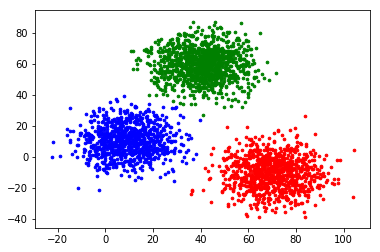

In [9]:
from matplotlib import pyplot as plt

for x,y in kms.clusters[0]:
    plt.scatter(x, y, c='red', s=7)    

for x,y in kms.clusters[1]:
    plt.scatter(x, y, c='blue', s=7)    

for x,y in kms.clusters[2]:
    plt.scatter(x, y, c='green', s=7)    